<a href="https://colab.research.google.com/github/MohanVishe/Supervised-ML--Regression----Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : <font color='red'>Predicting sales of a major store chain Rossmann</font>
# <font color='green'>Problem Description</font>
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# <font color='Green'>Data Description</font>

### Files
Rossman Store Data.csv = Historical data Including Sales 

(https://drive.google.com/file/d/15uo3JVFdAEItSBZ0bTlrJg4OgvFWg99l/view?usp=share_link)

store.csv=supplemental information about the stores

(https://drive.google.com/file/d/1BCBVnJThR2XUMOofdCz9S-wJuld7puBj/view?usp=share_link)

### Information About Features

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

1. Id - an Id that represents a (Store, Date) duple within the test set
2. Store - a unique Id for each store
3. Sales - the turnover for any given day (this is what you are predicting)
4. Customers - the number of customers on a given day
5. Open - an indicator for whether the store was open: 0 = closed, 1 = open
6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
8. StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
9. CompetitionDistance - distance in meters to the nearest competitor store
10. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
11. Promo - indicates whether a store is running a promo on that day
12. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
13. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
14. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that stor

### <font color='Green'>Businesss Problem</font>

Client interest and demand for product changes with time.  Which is important for growing business. Sales prediction is estimating the demand for a service or product for a particular time. This project contains real-world business problem 
of sales predicting with the help of machine learning models.

Our task is to predict sales and find important factors affecting demand to improve sales.

# <font color='green'>Data Collection</font>

### IMPORTING

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [39]:
df1=pd.read_csv("//content/drive/MyDrive/Projects/ Supervised ML Regression (Retail Sales Prediction)/Rossmann Stores Data.csv")

In [41]:
df2=pd.read_csv("/content/drive/MyDrive/Projects/ Supervised ML Regression (Retail Sales Prediction)/store.csv")

In [43]:
print("Row and Columns are ", df1.shape)
print("_"*100)
df1.head(3)

Row and Columns are  (1017209, 9)
____________________________________________________________________________________________________


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [42]:
print("Row and Columns are ", df2.shape)
print("_"*200)
df2.head(3)

Row and Columns are  (1115, 10)
________________________________________________________________________________________________________________________________________________________________________________________________________


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


# <font color='Green'>Data Preprocessing</font>

(https://www.v7labs.com/blog/data-preprocessing-guide)

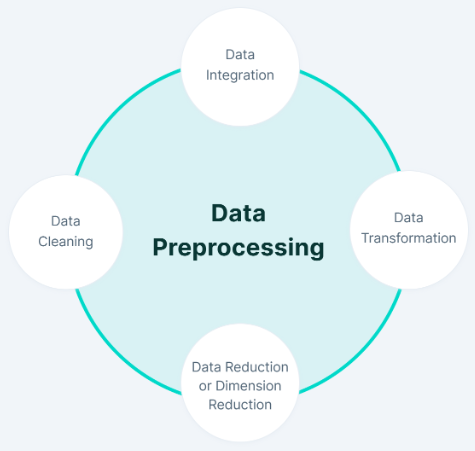

##  <font color='Green'>A. Data Cleaning</font>

### <font color='red'>1. Dealing with Null/Missing values</font>
(https://www.folkstalk.com/tech/find-columns-with-missing-values-pandas-with-code-examples/)


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###  <font color='orange'>Insights</font>

* There is presence of null values in dataset
* Categorical as well as numerical data is present in the dataset.

In [48]:
Colm_Miss=list()
for i in df2.columns:

  # find Precentage of null values presing in features
  
  if df2[i].isnull().sum() > 0:
    print(i,":",df2[i].isnull().sum()*100/len(df2),"%")
    Colm_Miss.append(i)

CompetitionDistance : 0.26905829596412556 %
CompetitionOpenSinceMonth : 31.748878923766817 %
CompetitionOpenSinceYear : 31.748878923766817 %
Promo2SinceWeek : 48.789237668161434 %
Promo2SinceYear : 48.789237668161434 %
PromoInterval : 48.789237668161434 %


#### 1. distribution `CompetitionDistance`

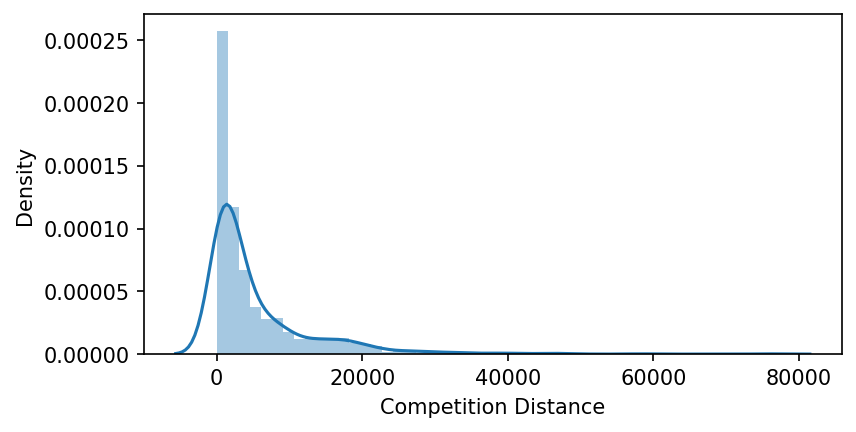

In [65]:
# distribution Competition Distance
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

plt.rcParams.update({'figure.figsize':(6,3),'figure.dpi':150})
sns.distplot(x=df2['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance')
plt.show()

### <font color='orange'>Insights</font>
---
* There is only one numerica feature `CompetitionDistance` with missing values which contain less than 1% of missing data and the distribution is skewed towards the right and Median has resistance to outliers .

*  The categorical features `Promo2SinceWeek Promo2SinceYear PromoInterval` contain around 48.8% of missing data which is very high 
*  So we cant drop the rows we have drop the feature , If the features 
are important we can replace them with mode or make the missing 
value as different category.
* `CompetitionOpenSinceMonth CompetitionOpenSinceYear` this two features have around 31.78 % of missing values.
---

#### filling `CompetitionDistace` with <font color='red'>Median</font> values 

In [49]:
df2["CompetitionDistance"]=df2["CompetitionDistance"].fillna(df2["CompetitionDistance"].median())

In [50]:
df2["CompetitionDistance"].isnull().any()

False

In [51]:
Colm_Miss.remove("CompetitionDistance")

####  1. Checking Unique values For Features

In [56]:
#  Seperate numerical and categorical columns
# (https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical)

Colm = set(df2.columns)
# Numerical data contain Columns 
# (https://www.folkstalk.com/2022/10/pandas-get-numeric-columns-with-code-examples.htmll)
Num_Colm= set(df2._get_numeric_data())

Cat_Colm= Colm-Num_Colm

print("Categorical Columns are",Cat_Colm)

Categorical Columns are {'Assortment', 'StoreType', 'PromoInterval'}


In [59]:
for i in Colm_Miss:
  print('\033[91m' , i , '\033[0m')
  print(df2[i].unique())

 CompetitionOpenSinceMonth 
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
 CompetitionOpenSinceYear 
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
 Promo2SinceWeek 
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
 Promo2SinceYear 
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
 PromoInterval 
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


#### Replacing with <font color='red'>Mode </font>values

In [60]:
for i in Colm_Miss:
  df2[i].fillna(df2[i].mode()[0], inplace = True)

In [62]:
#check
df2[Colm_Miss].isnull().sum()

CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

 ### <font color='Red'> 3. Removing outliers :</font> Using Boxplot for visualization


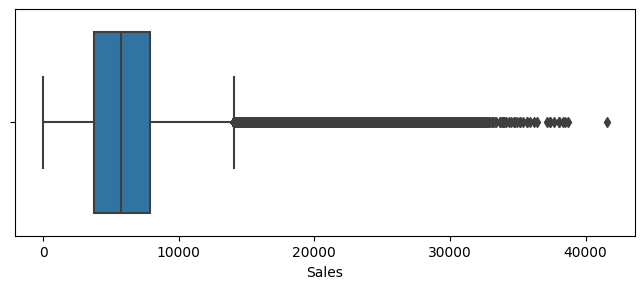

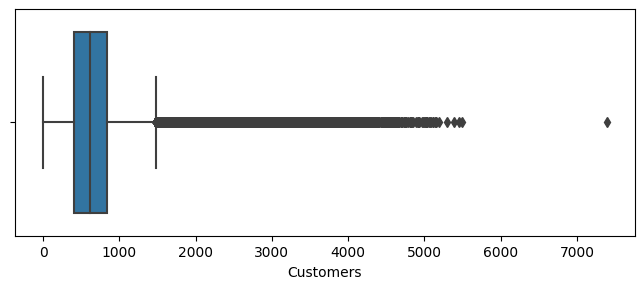

In [119]:
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
plt.rcParams.update({'figure.figsize':(8,3),'figure.dpi':100})


for i in list({"Customers","Sales"}):
  
  sns.boxplot(x=i,data=df1)
  plt.show()
  

### <font color='orange'>Insights</font>
---
* As Increase in sales can cause by increse advertising ,offers and festivals etc . So sales and cutomers can be high seach case
* We can reduce the effect of outliers by feature transformation
---

##  <font color='Green'>B. Data Integration</font>

In [74]:
# Using Merge as we want to join the columns with outer join
#(https://pandas.pydata.org/docs/user_guide/merging.html)

Sales = pd.merge(df1,df2, how="outer",on="Store")

In [75]:
print("Number of rows and columns for new dataframe is", Sales.shape)
print("_" * 200)
Sales.head(3)

Number of rows and columns for new dataframe is (1017209, 18)
________________________________________________________________________________________________________________________________________________________________________________________________________


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


##  Univariated Analysis

In [76]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [78]:
Sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [82]:
# '\033[91m' for colour red and'\033[0m' to end colour
# (https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python)

for i in list(set(Sales.columns)-{"Store","Date","CompetitionDistance","Sales","Customers"}):
  print('\033[91m' , i , '\033[0m')
  print(Sales[i].unique())

 SchoolHoliday 
[1 0]
 Open 
[1 0]
 CompetitionOpenSinceMonth 
[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
 Assortment 
['a' 'c' 'b']
 Promo 
[1 0]
 StateHoliday 
['0' 'a' 'b' 'c' 0]
 CompetitionOpenSinceYear 
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
 Promo2SinceWeek 
[14. 13.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35. 23.
 48. 36. 50. 44. 49. 28.]
 DayOfWeek 
[5 4 3 2 1 7 6]
 StoreType 
['c' 'a' 'd' 'b']
 Promo2 
[0 1]
 Promo2SinceYear 
[2011. 2010. 2012. 2009. 2014. 2015. 2013.]
 PromoInterval 
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


 ### <font color='Red'>3. At "StateHoliday" there were some entry of 0 as string and as integer so make them all integer</font>





In [83]:
Sales["StateHoliday"] = Sales["StateHoliday"].replace("0",0)

In [84]:
Sales["StateHoliday"].unique()

array([0, 'a', 'b', 'c'], dtype=object)

Value Count

0    835488
1    181721
Name: SchoolHoliday, dtype: int64


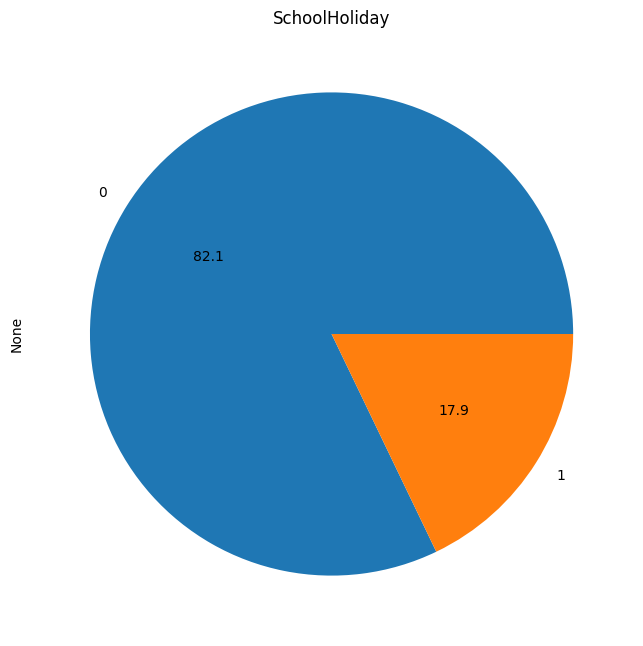

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
1    844392
0    172817
Name: Open, dtype: int64


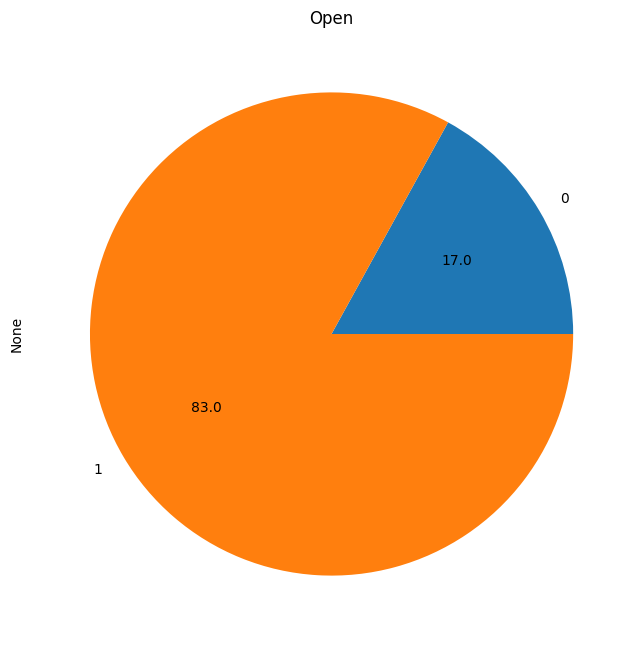

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
0    629129
1    388080
Name: Promo, dtype: int64


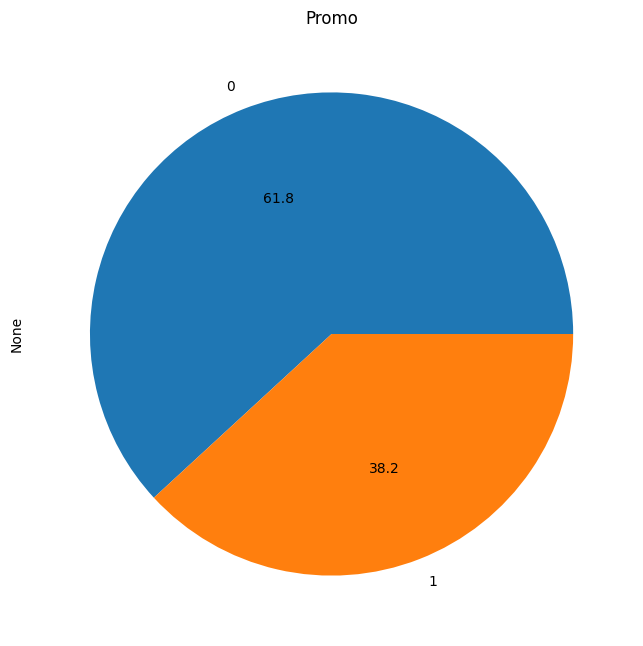

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


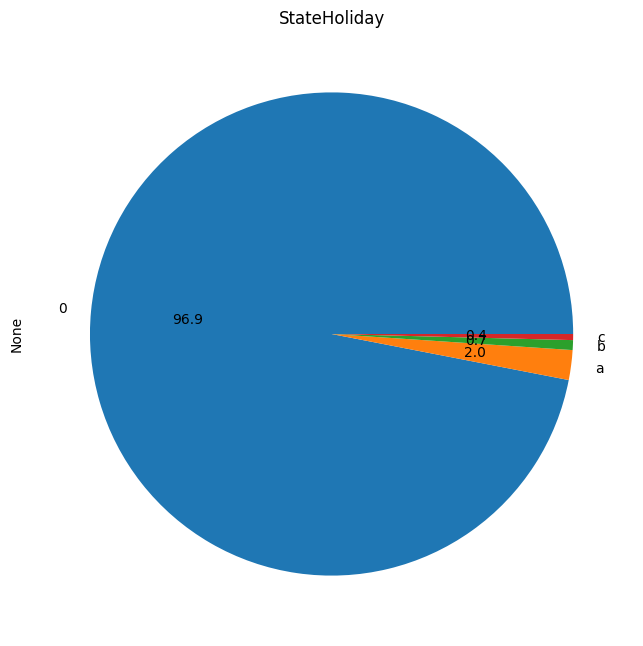

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64


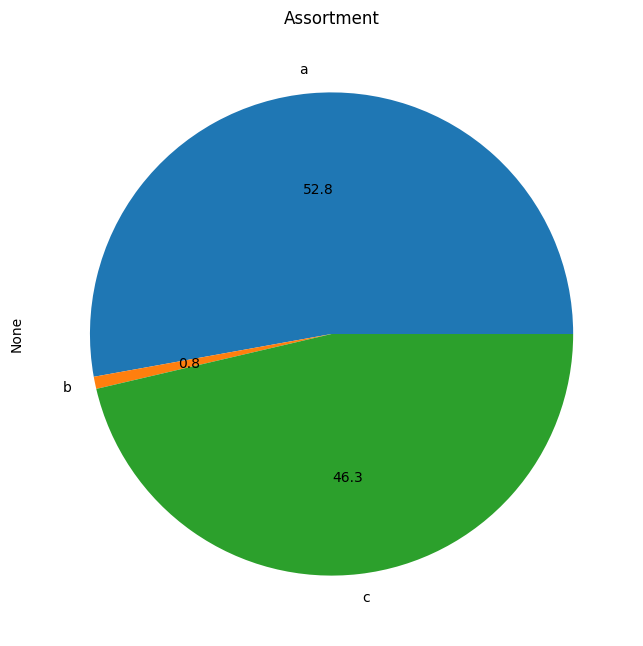

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64


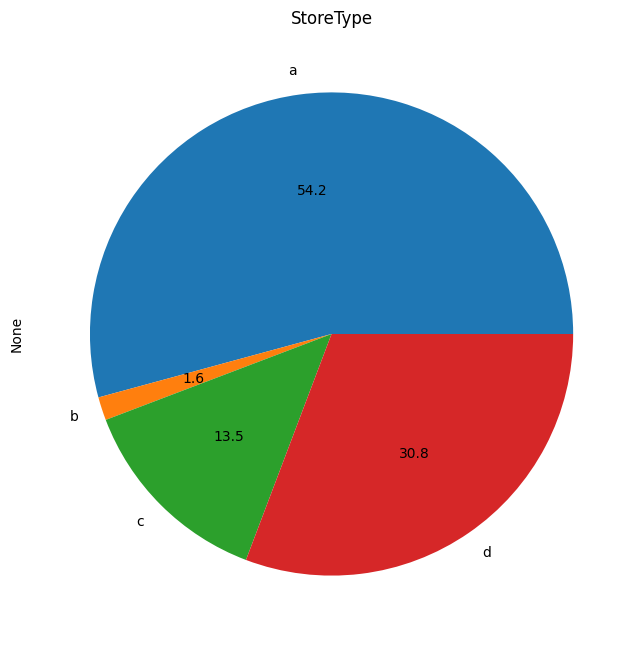

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
1    509178
0    508031
Name: Promo2, dtype: int64


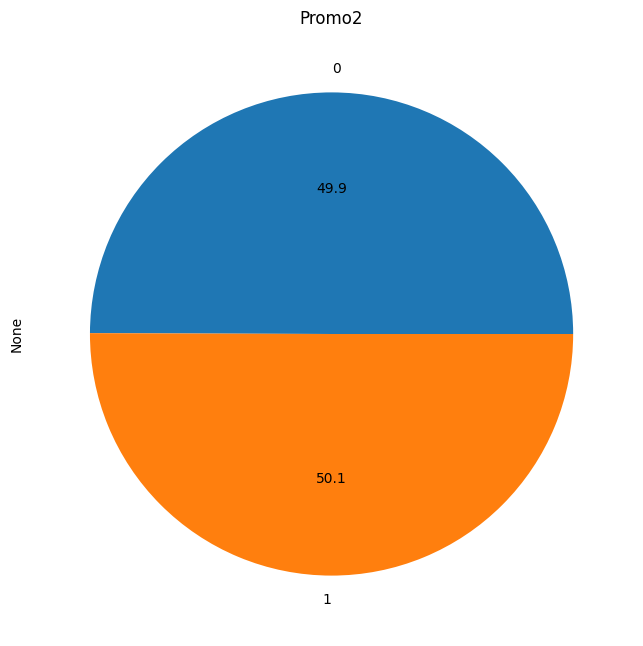

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


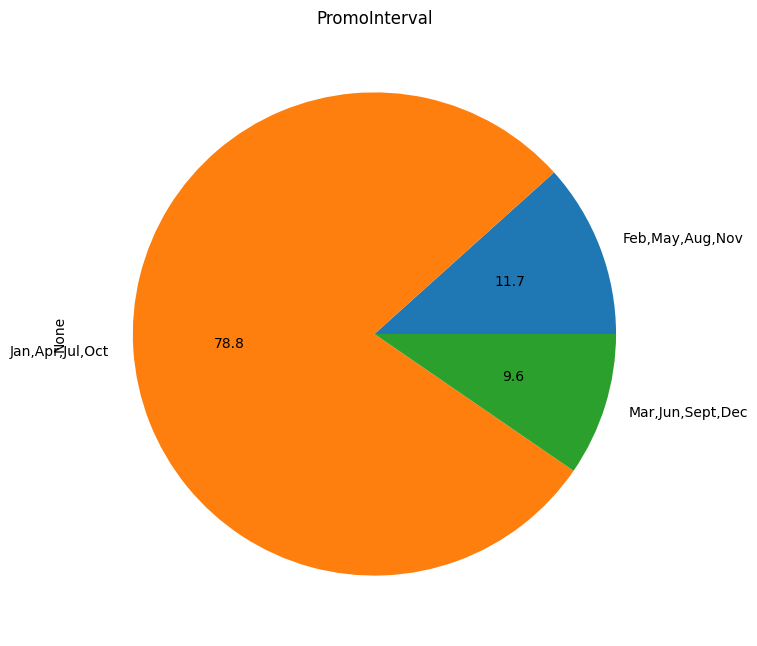

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


In [120]:
for i in set(Sales.columns):

  #cant visualize large number of categories
  if len(Sales[i].unique()) > 4:
    continue
  plt.rcParams.update({'figure.figsize':(8,8),'figure.dpi':100}) 
  Sales.groupby(i).size().plot(kind='pie',autopct='%.1f')
  print(Sales[i].value_counts())
  plt.title(i)
  
  plt.show()
  print("\033[91m = \033[0m" * 20)


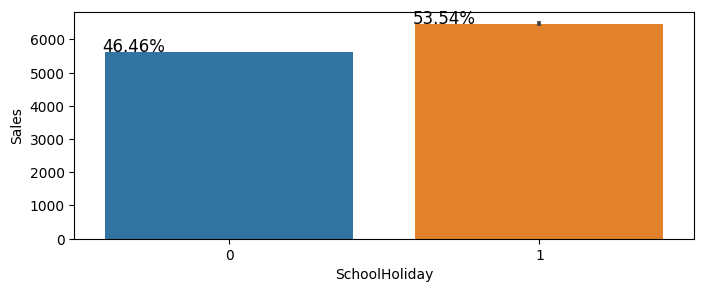

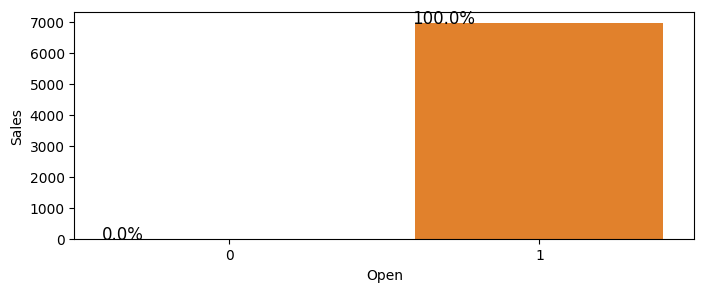

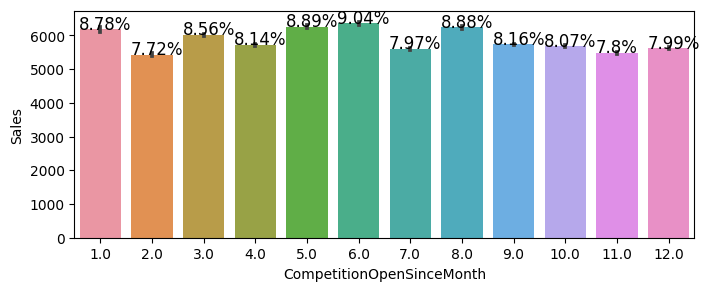

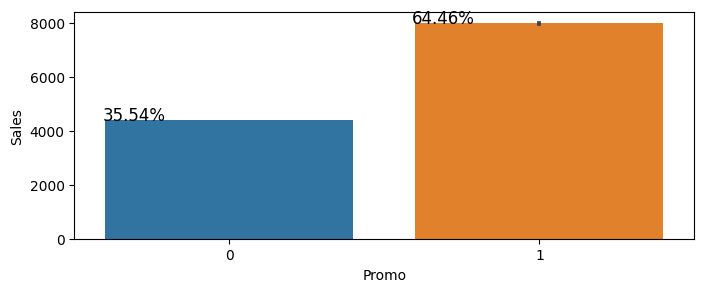

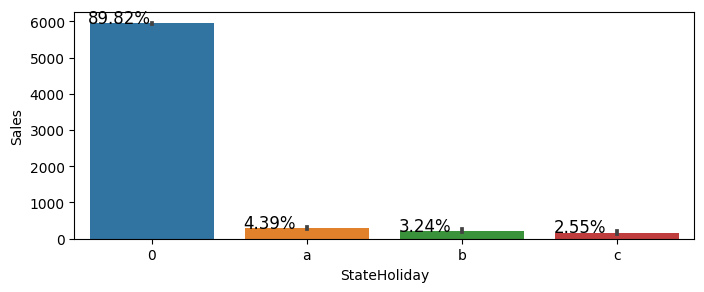

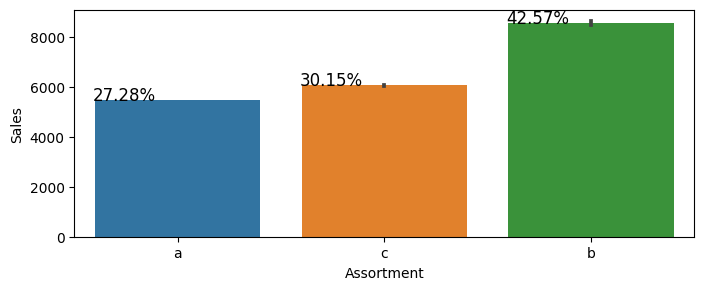

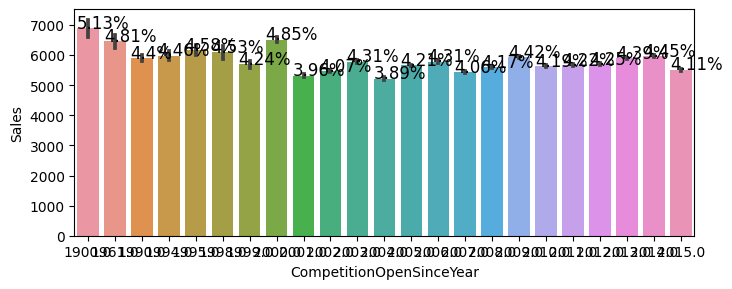

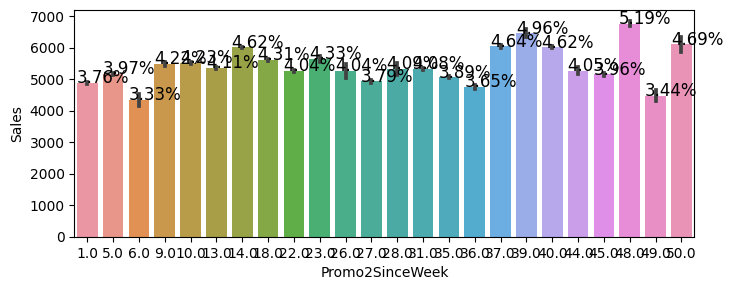

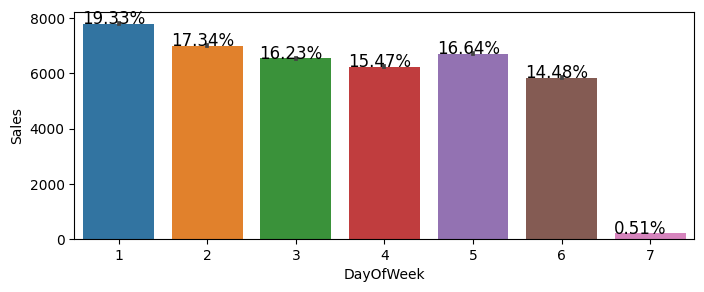

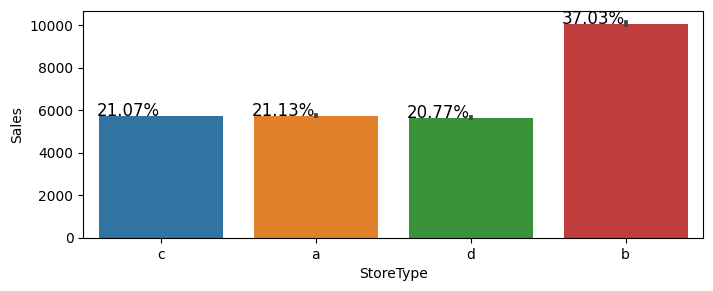

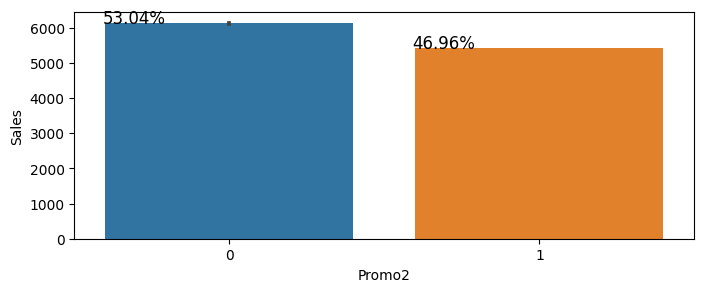

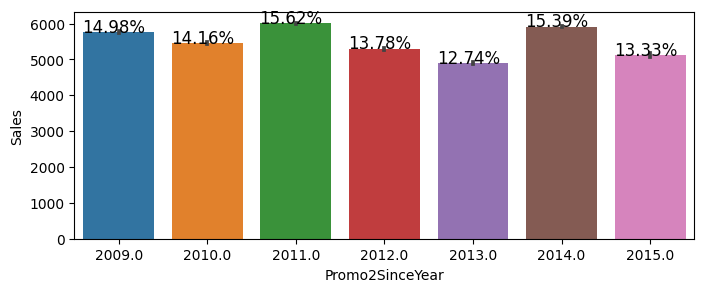

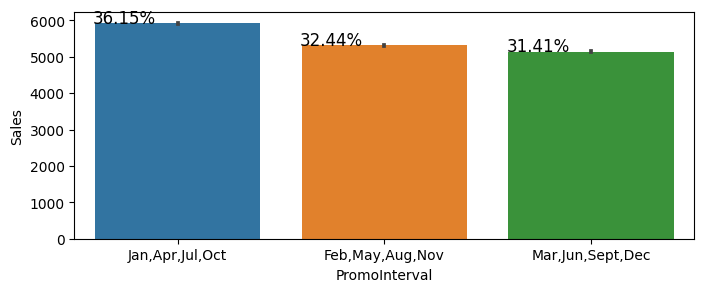

In [124]:
for i in set(Sales.columns):
  plt.rcParams.update({'figure.figsize':(8,3),'figure.dpi':100}) 
  #cant visualize large number of categories
  if len(Sales[i].unique()) > 100:
    continue
  ax = sns.barplot(x=Sales[i], y=Sales['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()
  

## Multivariated Analysis

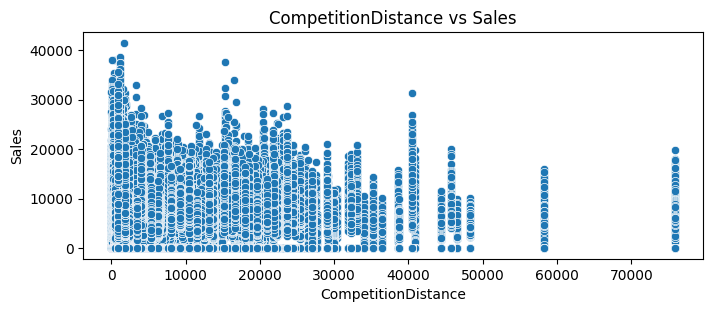

In [125]:

sns.scatterplot(data=Sales,x="CompetitionDistance",y="Sales")
plt.title("CompetitionDistance vs Sales")
plt.show()

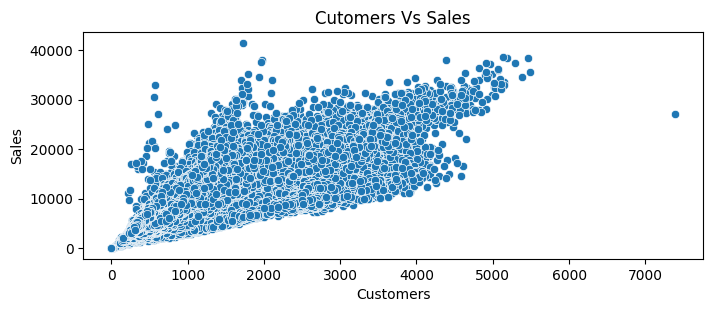

In [126]:

sns.scatterplot(data=Sales,x="Customers",y="Sales")
plt.title("Cutomers Vs Sales")
plt.show()

### 3. Correlation Between Features 

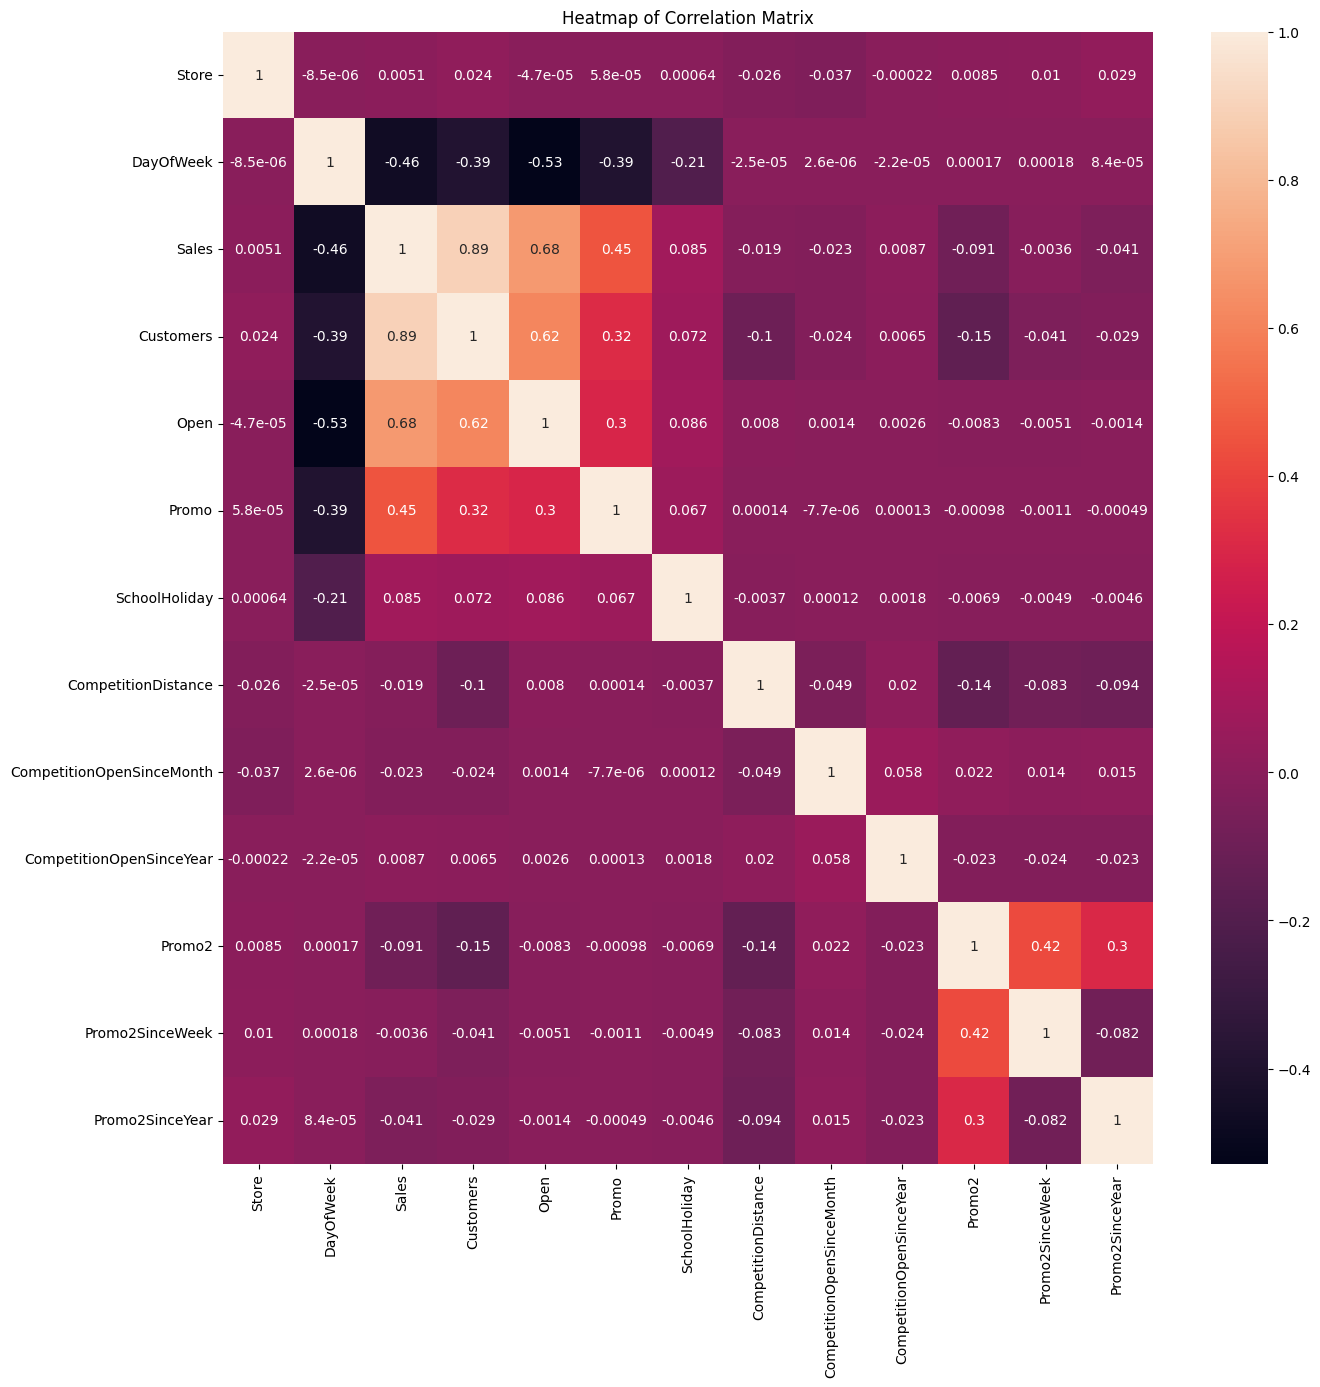

In [127]:
# Increase figure size so it would be understandable
plt.figure(figsize = (15,15))

#correlation matrix
CM=Sales.corr() 
sns.heatmap(CM,annot=True) 
plt.title("Heatmap of Correlation Matrix") 
plt.show()

### <font color='orange'>Insights</font>
---
* `Customers,Sales,Open,Promo` are high and positively correlated with each other which is understandable
* Where `DayOFWeek` has negative correlation with this features
* `'Promo2', 'Promo2SinceWeek','Promo2SinceYear'` has some correlation with each other
---

In [23]:
# Appling one hot encoding (Using get_dummies approach)
# (https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)

Sales=pd.get_dummies(Sales,columns=['StateHoliday', 'Assortment',"StoreType" ])
Sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d'],
      dtype='object')

In [ ]:
Sales.shape

(1014954, 21)

##  <font color='Green'>C. Data Transformation </font>

### Checking Distribution

           Customers 


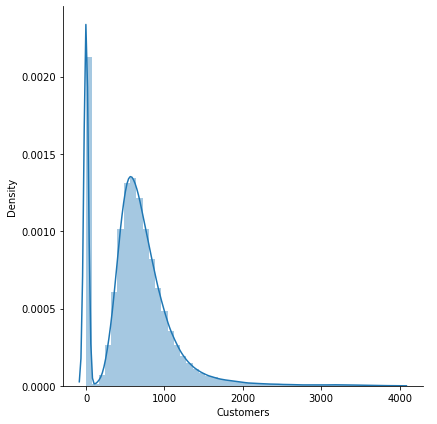

************************************************************
           CompetitionDistance 


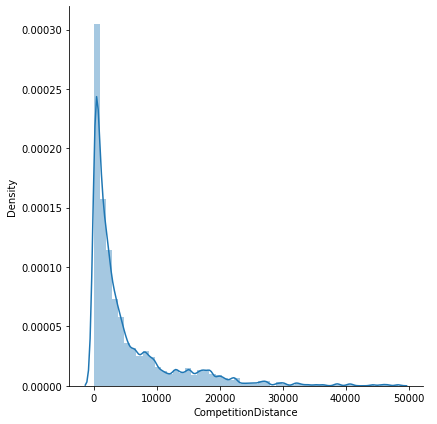

************************************************************
           Sales 


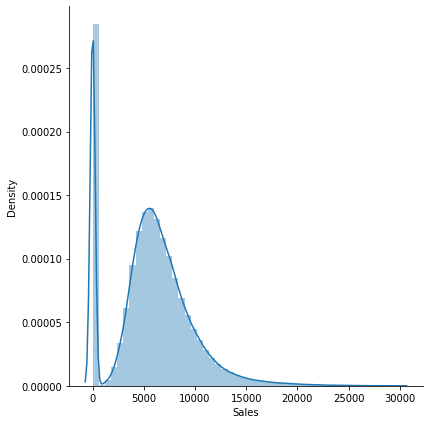

************************************************************


In [ ]:
for i in list(Num_Colm-Cat_Colm_Remain):
  print('          \033[91m' , i , '\033[0m')
  
  sns.FacetGrid(Sales,size=6)\
    .map(sns.distplot,i)\
    .add_legend(); 
  
  plt.show()
  print("*"*60)

### <font color='orange'>Insights</font>
---
* The numberical features are not showing normal distribution 
* We have to try feature transformation 
* From Box plot we can see that there is presence of outliers in 
the data 
---

####  1. Apply log transformation to `CompetitionDistance`

Text(0.5, 1.0, 'Log-Transformed')

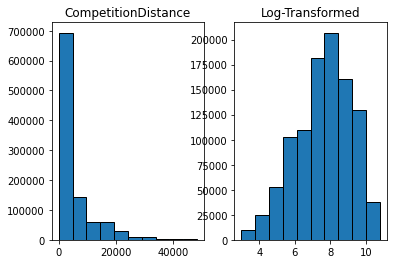

In [ ]:
# (https://www.statology.org/transform-data-in-python/)


#create log-transformed data
data_log = np.log(Sales["CompetitionDistance"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["CompetitionDistance"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('CompetitionDistance')
axs[1].set_title('Log-Transformed')


In [ ]:
Sales["CompetitionDistance"]= np.log(Sales["CompetitionDistance"])

####  2. Apply Square root transformation to `Customers`

Text(0.5, 1.0, 'SQRT transform')

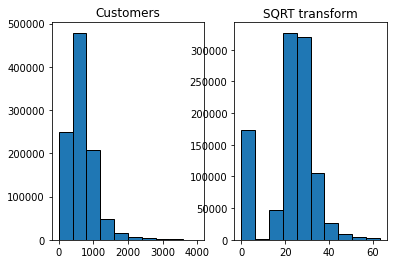

In [ ]:
#create log-transformed data
data_log = np.sqrt(Sales["Customers"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["Customers"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('Customers')
axs[1].set_title('SQRT transform')


In [ ]:
Sales["Customers"]= np.sqrt(Sales["Customers"])

####  3. Apply Square root transformation to `Sales`

Text(0.5, 1.0, 'SQRT transform')

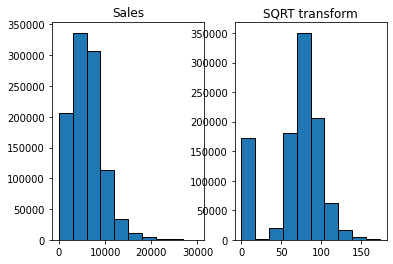

In [ ]:
#create log-transformed data
data_log = np.sqrt(Sales["Sales"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["Sales"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('Sales')
axs[1].set_title('SQRT transform')

In [ ]:
Sales["Sales"]= np.sqrt(Sales["Sales"])

### Transformed Data

           CompetitionDistance 


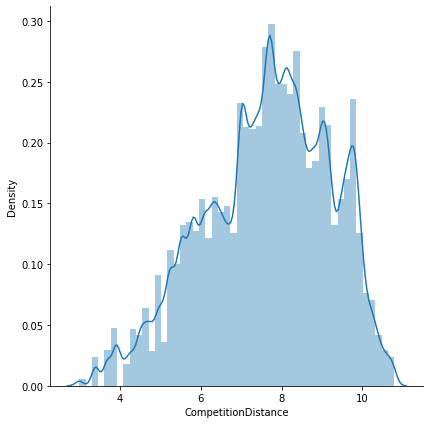

************************************************************
           Sales 


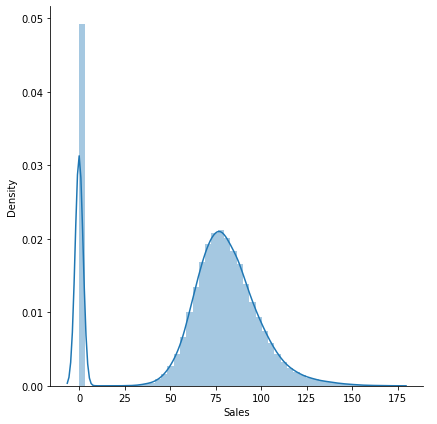

************************************************************
           Customers 


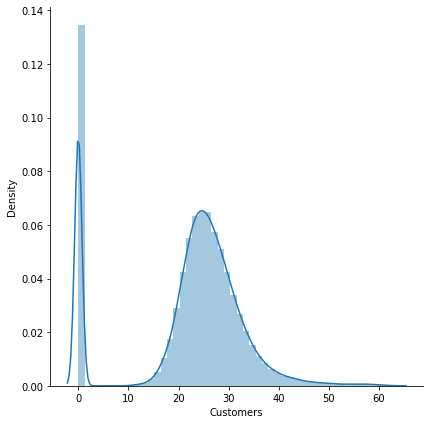

************************************************************


In [ ]:
for i in list(Num_Colm-Cat_Colm_Remain):
  print('          \033[91m' , i , '\033[0m')
  
  sns.FacetGrid(Sales,size=6)\
    .map(sns.distplot,i)\
    .add_legend(); 
  
  plt.show()
  print("*"*60)

# Train and Test Data (Random Splitting)

In [24]:
X=Sales[list(set(Sales.columns)-{"Sales","Date"})]
Y=Sales["Sales"]

In [25]:
# To split the data with 20% of data in test
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2022)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [27]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
Ypred=regressor.predict(X_test)

In [30]:
r2 = r2_score(y_test, Ypred)
print(r2)

0.8998647181004586
